In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
import os
import numpy as np
import copy
import json
import cv2
from tqdm import tqdm
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

import IPython
from IPython.display import Image as img
from IPython.display import display

from PIL import Image

import torch
import torch.nn as nn
import torchvision
from torch.nn import functional as F

In [4]:
from src.datamodules.datasets.emoreccom import EmoRecComDataset
from src.models.bert_classifier_model import BertClassifierLitModel
from src.datamodules.datasets.dataset_modality import DatasetModality
from src.datamodules.emoreccom_datamodule import EmoRecComDataModule
from src.utils.text.text_utils import merge_comic_texts
from src.utils.text.goemotions_utils import goemotions_emotion_list, emoreccom_goemotions_emotion_mapping
from src.utils.metric.micro_auc import compute_micro_auc
from src.utils.emoreccom_label_transforms import normalize_and_take_top_n
from src.datamodules.transform_datamodule import ValTransform, SlightTransform, MediumTransform, FullTransform, ImageTransform, CropType

In [5]:
emoreccom_path = "/userfiles/comics_grp/datasets/EmoRecCom/"
dataset = EmoRecComDataset(emoreccom_path, train=True, label_transform=None)

In [6]:
transform1 = ImageTransform(
    grayscale_prob=0.0,
    distort_prob=1.0, # check
    distort_hgain=0.015, 
    distort_sgain=0.7,
    distort_vgain=0.4,
    hflip_prob=0.0,
    pad_to_square=False,
    resize_len=(224, 224),
    crop_type=CropType.NoCrop,
    crop_len_ratio=0.9,
    crop_min_ratio=0.5,
    gaussian_noise_prob=0.0, 
    gaussian_noise_pixel_prob=0.3,
    random_perspective_prob=0.0,
    degrees=10,
    translate=0.1,
    scale=0.9,
    shear=10,
    perspective=0.0,
    border=(0, 0)
)

In [ ]:
transform1 = ValTransform() # others can be set here 

1872 (523, 424, 3)
1872 torch.Size([3, 224, 224])


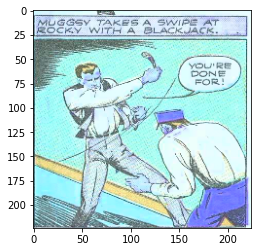

In [17]:
idx = np.random.randint(dataset.__len__())
img, sizes, (labels, polarities), (narrative, dialog) = dataset.__getitem__(idx)
print(idx, img.shape)
img = transform1(img)
print(idx, img.shape)
img = (img.permute(1, 2, 0) + 1) / 2
plt.imshow(img)

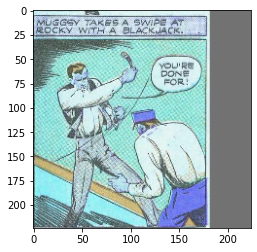

In [18]:
# idx = np.random.randint(dataset.__len__())
img, sizes, (labels, polarities), (narrative, dialog) = dataset.__getitem__(idx)
img = ValTransform()(img)
plt.imshow((img.permute(1, 2, 0) + 1) / 2)